# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [244]:
df = pd.read_csv("/Users/anirudhvemuri/desktop/MDST-Onboarding-main/data/states_edu.csv")
print(df.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [245]:
# @@@ 1
# Your Code
print(len(set(df["YEAR"])))

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [246]:
# @@@ 2

mich_avg = df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()['MICHIGAN']
ohio_avg = df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()['OHIO']
if(mich_avg > ohio_avg):
   print("MICHIGAN")
else:
   print("OHIO")

OHIO


Find the average for your chosen test across all states in 2019

In [247]:
# @@@ 3
avg_2019 = df.groupby('YEAR')['AVG_MATH_8_SCORE'].mean()[2019]
print(avg_2019)

281.2641509433962


For each state, find a maximum value for your chosen test score

In [248]:
# @@@ 4
state_maxes = {state: float(group['AVG_MATH_8_SCORE'].max()) for state, group in df.groupby('STATE')}
print(state_maxes)

{'ALABAMA': 269.0, 'ALASKA': 283.0, 'ARIZONA': 283.0, 'ARKANSAS': 279.0, 'CALIFORNIA': 277.0, 'COLORADO': 292.0, 'CONNECTICUT': 289.0, 'DELAWARE': 284.0, 'DISTRICT_OF_COLUMBIA': 269.0, 'DODEA': 293.0, 'FLORIDA': 281.0, 'GEORGIA': 281.0, 'HAWAII': 281.0, 'IDAHO': 287.0, 'ILLINOIS': 285.0, 'INDIANA': 288.0, 'IOWA': 286.0, 'KANSAS': 290.0, 'KENTUCKY': 282.0, 'LOUISIANA': 273.0, 'MAINE': 289.0, 'MARYLAND': 288.0, 'MASSACHUSETTS': 301.0, 'MICHIGAN': 280.0, 'MINNESOTA': 295.0, 'MISSISSIPPI': 274.0, 'MISSOURI': 286.0, 'MONTANA': 293.0, 'NATIONAL': 285.0, 'NEBRASKA': 288.0, 'NEVADA': 278.0, 'NEW_HAMPSHIRE': 296.0, 'NEW_JERSEY': 296.0, 'NEW_MEXICO': 274.0, 'NEW_YORK': 283.0, 'NORTH_CAROLINA': 286.0, 'NORTH_DAKOTA': 293.0, 'OHIO': 290.0, 'OKLAHOMA': 279.0, 'OREGON': 285.0, 'PENNSYLVANIA': 290.0, 'RHODE_ISLAND': 284.0, 'SOUTH_CAROLINA': 282.0, 'SOUTH_DAKOTA': 291.0, 'TENNESSEE': 280.0, 'TEXAS': 290.0, 'UTAH': 287.0, 'VERMONT': 295.0, 'VIRGINIA': 290.0, 'WASHINGTON': 290.0, 'WEST_VIRGINIA': 274.0,

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [249]:
# @@@ 5
# Measuring the instructional expenditure of each state
instruction_investment = {state: float(group['INSTRUCTION_EXPENDITURE'].mean()) for state, group in df.groupby('STATE')}
# Measuring the total revenue of each state of each state
revenue_by_state = {state: float(group['TOTAL_REVENUE'].mean()) for state, group in df.groupby('STATE')}
# Calculating the rate of instructional investment of each state to their revenue 
investment_to_revenue_ratio = {state: instruction_investment[state] / revenue_by_state[state] for state in instruction_investment}
avg_score = df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()
# Calculating a score for each state based on their average score and their instructional investment to total revenue ratio
avg_score_to_investment_revenue_ratio = {state: float(avg_score[state] / investment_to_revenue_ratio[state]) for state in investment_to_revenue_ratio}
print(avg_score_to_investment_revenue_ratio)

{'ALABAMA': 498.78297677243296, 'ALASKA': 539.7701932050327, 'ARIZONA': 597.32710656231, 'ARKANSAS': 516.0698705365118, 'CALIFORNIA': 538.6542863109441, 'COLORADO': 571.8156172575674, 'CONNECTICUT': 521.3143037599215, 'DELAWARE': 518.4249612637807, 'DISTRICT_OF_COLUMBIA': 585.9228415437514, 'DODEA': nan, 'FLORIDA': 547.2483832952084, 'GEORGIA': 507.1213465343738, 'HAWAII': 549.4485756070885, 'IDAHO': 520.9523547165091, 'ILLINOIS': 546.3800005123716, 'INDIANA': 598.7684919271862, 'IOWA': 563.2347939473763, 'KANSAS': 564.4225897997609, 'KENTUCKY': 524.1695811427235, 'LOUISIANA': 513.9010408162943, 'MAINE': 512.6754950646927, 'MARYLAND': 523.5058861244306, 'MASSACHUSETTS': 515.3809266031689, 'MICHIGAN': 575.6105702236512, 'MINNESOTA': 547.5705314384071, 'MISSISSIPPI': 504.68930752026284, 'MISSOURI': 536.3738795601089, 'MONTANA': 522.4354786134487, 'NATIONAL': nan, 'NEBRASKA': 511.4423703499492, 'NEVADA': 543.6728107677701, 'NEW_HAMPSHIRE': 520.1111506019315, 'NEW_JERSEY': 544.842993466991

Feature engineering justification: Since education is regulated at a state level in most cases, I thought a potentially informative statistic to see how effectively a state spends its funding on instruction is the rate of how high their scores are relative to how much they spend. Additionally, since states with higher populations would get more funding, I used a ratio of how much of their funding a state received to how much they spent on instruction to gauge the state's priority on instruction equitably.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

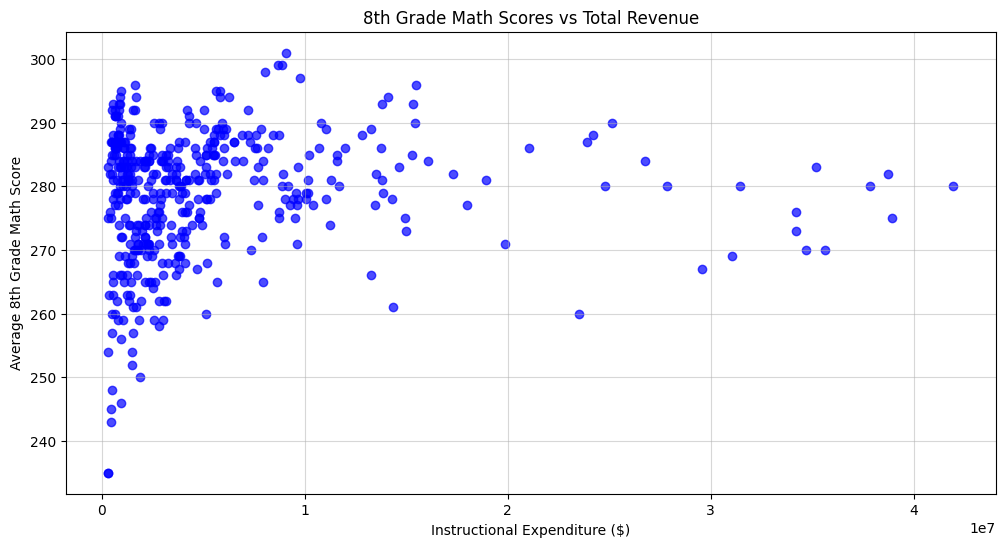

In [250]:
# @@@ 6
plt.figure(figsize=(12,6))
plt.scatter(df['INSTRUCTION_EXPENDITURE'], df['AVG_MATH_8_SCORE'], alpha=0.7, color='blue')
plt.xlabel('Instructional Expenditure ($)')
plt.ylabel('Average 8th Grade Math Score')
plt.title('8th Grade Math Scores vs Total Revenue')
plt.grid(True, alpha=0.5)
plt.show()

A scatterplot visualising the correlation between the instructional expenditure of a state and their average 8th grade math scores. There seems to be a weak positive correlation where higher instructional expenditures have a weak association with higher average 8th grade math scores.

**Visualization 2**

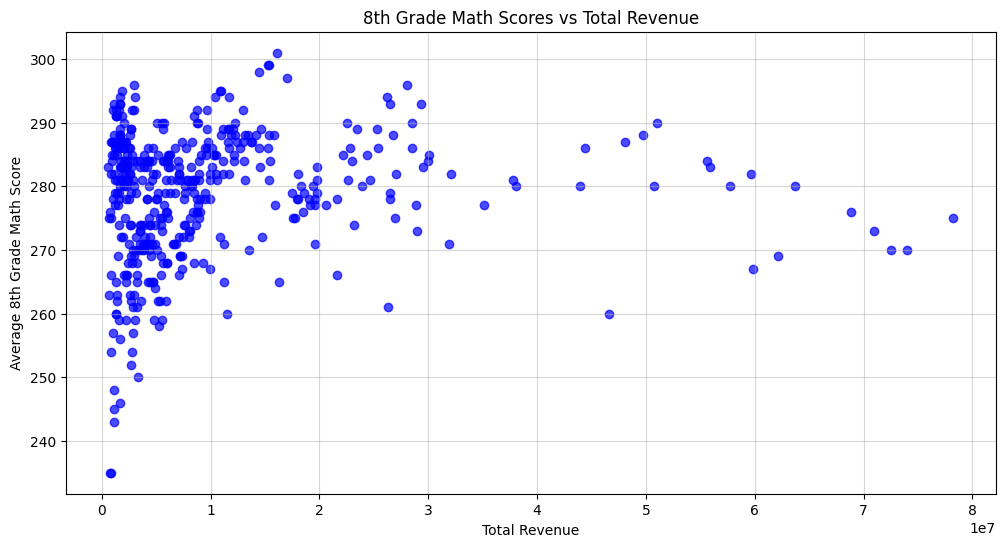

In [251]:
# @@@ 7
plt.figure(figsize=(12,6))
plt.scatter(df['TOTAL_REVENUE'], df['AVG_MATH_8_SCORE'], alpha=0.7, color='blue')
plt.xlabel('Total Revenue')
plt.ylabel('Average 8th Grade Math Score')
plt.title('8th Grade Math Scores vs Total Revenue')
plt.grid(True, alpha=0.5)
plt.show()

A scatterplot visualising the correlation between the revenue of a state and their average 8th grade math scores. There again seems to be a weak positive correlation where higher total revenue as a state has a weak association with higher average 8th grade math scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
# @@@ 8

X = df[['AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [263]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [257]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [264]:
# @@@ 11
model = LinearRegression()

In [265]:
model.fit(X_train, y_train)

LinearRegression()

In [266]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [267]:
# @@@ 12
model.score(X_test, y_test)
np.mean(model.predict(X_test)-y_test)
np.mean(np.abs(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5

0.9139898681580971

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

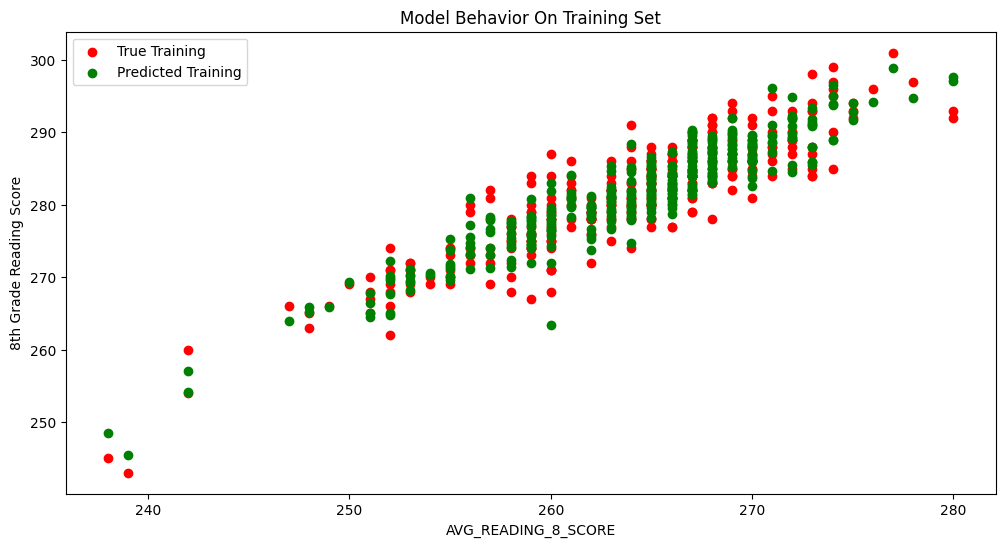

In [270]:
# @@@ 13

col_name = 'AVG_READING_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Reading Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

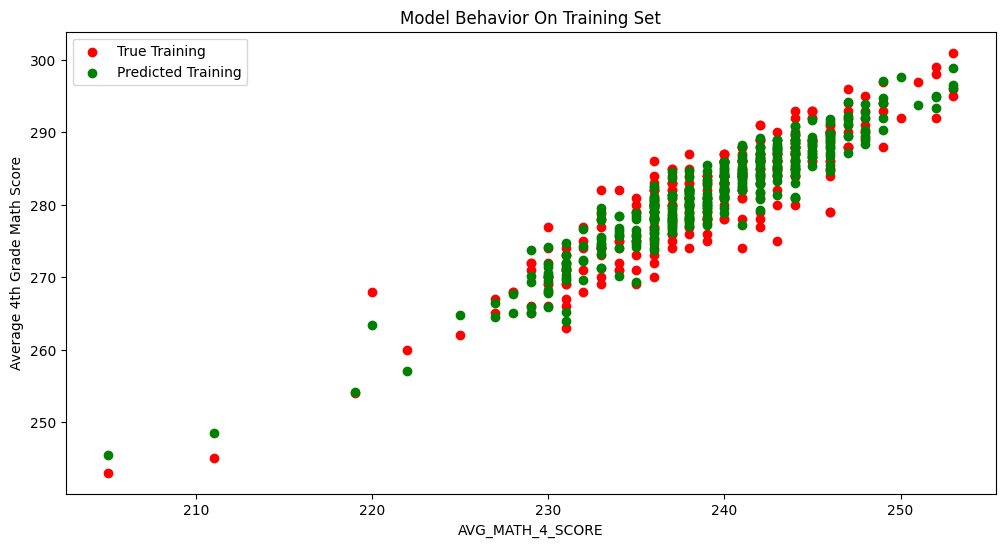

In [271]:
# @@@ 13

col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 4th Grade Math Score')
plt.title("Model Behavior On Training Set")